# REPERTOIRE

In [1]:
# C:\Users\dieud\Documents\OPENCLASSROOMS\FORMATION_DATA_SCIENTIST\PROJETS_DS_OCR\PROJET6
# PROJET5_DATA_SCIENTIST_OCR
# Changement du repertoire: A ne plus changer.
import os
os.chdir('C://Users//dieud//Documents//OPENCLASSROOMS//FORMATION_DATA_SCIENTIST//PROJETS_DS_OCR//ESSAI')

In [2]:
#!pip list

# IMPORTATION DES LIBRAIRIES USITEES POUR L'ETUDE.

In [3]:
#!pip install transformers

In [4]:
#pip install --upgrade transformers

In [5]:
#!pip install gensim

In [6]:
#pip show matplotlib

In [7]:
#!pip install tensorflow

In [8]:
#!pip install nltk

In [9]:
#!pip install missingno

In [10]:
#!pip install scikit-learn

In [11]:
#!pip install wordcloud

In [12]:
#pip uninstall numpy

In [13]:
#!pip install --upgrade tensorflow_hub

In [14]:
#!pip install opencv-contrib-python

In [15]:
#!pip install pandas

In [16]:
#!pip install matplotlib

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

import string
import random
import time

import missingno as msno
import seaborn as sns
sns.set() 
import sys
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster
from sklearn.cluster import KMeans
OMP_NUM_THREADS=5.
from sklearn.manifold import TSNE
from sklearn import metrics

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams
# My own Adds
import nltk
nltk.download('stopwords')

from wordcloud import WordCloud

import gensim

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model

import os
from os import listdir
import transformers
from transformers import TFAutoModel, AutoTokenizer
#from transformers import logging as hf_logging
from transformers import logging

from IPython.display import display

import warnings
#plt.style.use('seaborn-whitegrid')
warnings.filterwarnings('ignore')
sns.set_theme()

# Versions
print('Version des librairies utilisées :')
print('NumPy                 : ' + np.version.full_version)
print('Pandas                : ' + pd.__version__)
print('Python                : ' + sys.version)
print('Seaborn               : ' + sns.__version__)
#print('Cv2                   : ' + cv2.__version__)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dieud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Version des librairies utilisées :
NumPy                 : 1.24.3
Pandas                : 1.5.3
Python                : 3.10.11 | packaged by Anaconda, Inc. | (main, Apr 20 2023, 18:56:50) [MSC v.1916 64 bit (AMD64)]
Seaborn               : 0.12.2


# ANALYSE DES DONNEES TEXTUELLES.

## Sommaire <a class="anchor" id="Sommaire"></a>

* [Données textuelles](#Partie1)    
    * [Chargement des données textuelles](#Partie1_1)
    * [Nettoyage des données textuelles](#Partie1_2)
    * [Gestion des catégories](#Partie1_3)
    * [Approches Bag Of Words](#Partie1_4)
    * [Sentence embedding](#Partie1_5)

In [18]:
df_articles = pd.read_csv('DATA/flipkart_com-ecommerce_sample_1050.csv')
print(df_articles.shape)
df_articles.head()

(1050, 15)


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [19]:
taux_remp = 100*(1-df_articles.isnull().sum().sum()
                 / (df_articles.shape[0]*df_articles.shape[1]))
print('Le dataset présente un taux de remplissage de '
      + str(round(taux_remp)) + '%.')

Le dataset présente un taux de remplissage de 98%.


Les variables intéressantes pour notre étude sont :
- ```product_name``` pour récupérer le nom du produit,
- ```product_category_tree``` pour connaître la catégorie du produit,
- ```description``` pour prédire la catégorie,
- ```image``` pour retrouver l'image correspondante à l'article.

In [20]:
df_ = df_articles[['product_name', 'product_category_tree',
                   'image', 'description']]
df_.head()

,product_name,product_category_tree,image,description
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...


[Retour au sommaire](#Sommaire)
### Nettoyage des données textuelles <a class="anchor" id="Partie1_2"></a>

In [21]:
def Nettoyage(texte, print_):
    if print_:
        print('Phrase initiale :')
        print(texte)
        print()

    # Normalisation
    texte_ = texte.lower()
    if print_:
        print('Après normalisation :')
        print(texte_)
        print()

    # Tokénisation
    texte_ = word_tokenize(texte_)
    if print_:
        print('Après tokénisation :')
        print(texte_)
        print()

    # Suppression des stop words
    stopW = stopwords.words('english')
    exclude = set(string.punctuation)
    stopW.extend(exclude)
    texte_ = [word for word in texte_ if word not in stopW]
    if print_:
        print('Après suppression des stop words :')
        print(texte_)
        print()

    # Lemmatization (ou Stemming)
    lemma = WordNetLemmatizer()
    texte_ = [lemma.lemmatize(lemma.lemmatize(
        lemma.lemmatize(word, pos='a'), pos='v'), pos='n') for word in texte_]
    if print_:
        print('Après lemmatization :')
        print(texte_)
        print()

    # Jointure des mots
    texte_ = ' '.join(word for word in texte_)
    if print_:
        print('Phrase finale :')
        print(texte_)
        print()

    return texte_

In [22]:
Phrase = df_['description'].iloc[0]
# 'This is a group of several words for preprocessing !'
Phrase_nettoyee = Nettoyage(Phrase, True)

Phrase initiale :
Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your

In [23]:
df_['description'] = df_['description'].apply(lambda x: Nettoyage(x, False))
df_['product_name'] = df_['product_name'].apply(lambda x: Nettoyage(x, False))

In [24]:
# Save this file for the following uses.
df_.to_csv("df_tokens")

[Retour au sommaire](#Sommaire)
### Gestion des catégories <a class="anchor" id="Partie1_3"></a>

In [25]:
len(df_['product_category_tree'].unique())

642

In [26]:
def main_category(cat):
    index = cat.find(' >>')
    main_cat = cat[2:index]
    return main_cat

In [27]:
df_['Catégorie'] = df_['product_category_tree'].apply(lambda x: main_category(x))
df_['Catégorie'] = df_['Catégorie'].astype('category')
le = preprocessing.LabelEncoder()
df_['Catégorie Numérique'] = le.fit_transform(df_['Catégorie'])
Categories = df_['Catégorie'].unique()
Categories_num = df_['Catégorie Numérique']

print('Catégorie avant traitement :', df_['product_category_tree'][12])
print('\nCatégorie après traitement :', df_['Catégorie'][12])

df_.drop(['product_category_tree'], axis=1, inplace=True)
df_.head()

Catégorie avant traitement : ["Watches >> Wrist Watches >> Lois Caron Wrist Watches"]

Catégorie après traitement : Watches


,product_name,image,description,Catégorie,Catégorie Numérique
0,elegance polyester multicolor abstract eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,key feature elegance polyester multicolor abst...,Home Furnishing,4
1,sathiyas cotton bath towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,specification sathiyas cotton bath towel 3 bat...,Baby Care,0
2,eurospa cotton terry face towel set,64d5d4a258243731dc7bbb1eef49ad74.jpg,key feature eurospa cotton terry face towel se...,Baby Care,0
3,santosh royal fashion cotton print king size d...,d4684dcdc759dd9cdf41504698d737d8.jpg,key feature santosh royal fashion cotton print...,Home Furnishing,4
4,jaipur print cotton floral king size double be...,6325b6870c54cd47be6ebfbffa620ec7.jpg,key feature jaipur print cotton floral king si...,Home Furnishing,4


In [28]:
len(df_['Catégorie'].unique())

7

In [29]:
# Save this file for the following uses.
df_.to_csv("df_tokens1")

### WordCloud

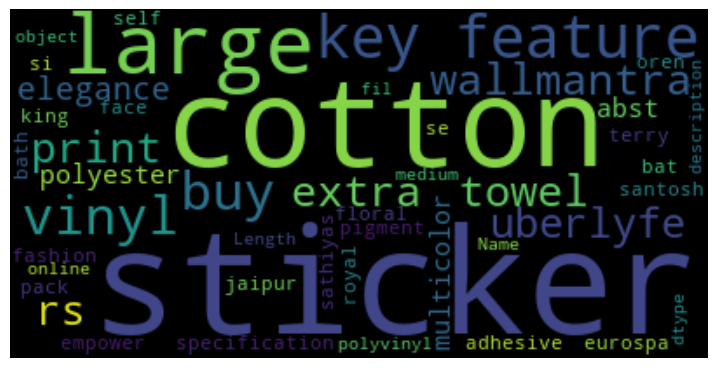

In [31]:
save_results_to = 'C:/Users/dieud/Documents/OPENCLASSROOMS/FORMATION_DATA_SCIENTIST/PROJETS_DS_OCR/ESSAI/GRAPHS/'

# WordCloud pour 'description'
# Instantiate a new wordcloud.
wordcloud = WordCloud()

# Apply the wordcloud to the text.
wordcloud.generate(str(df_['description']))

# create a figure
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
# and remove the axis
plt.axis("off")
plt.savefig(save_results_to + '6-WC_descript', dpi=300)
plt.show()

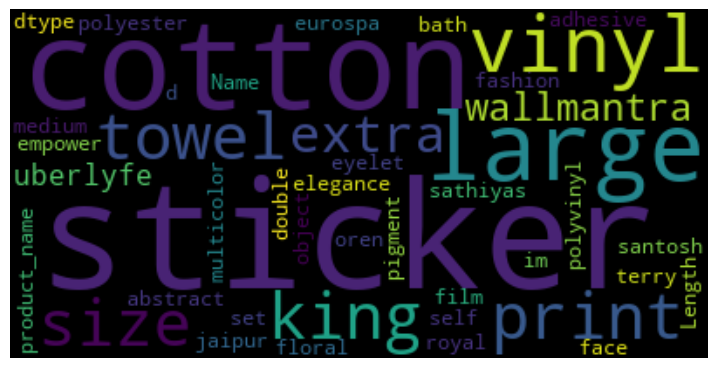

In [32]:
# WordCloud pour 'product_name'
wordcloud = WordCloud()
wordcloud.generate(str(df_['product_name']))

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(save_results_to + '7-WC_prodname', dpi=300)
plt.show()

[Retour au sommaire](#Sommaire)
### Approche Bag Of Words <a class="anchor" id="Partie1_4"></a>

* [CountVectorizer](#PartieA)
    * [Seulement avec la description](#PartieA_1)
    * [Avec la description et le nom de l'article](#PartieA_2)
    * [Seulement avec le nom](#PartieA_3)
* [Tf-Idf](#PartieB)
    * [Seulement avec la description](#PartieB_1)
    * [Avec la description et le nom de l'article](#PartieB_2)
    * [Seulement avec le nom](#PartieB_3)
* [Comparaison des performances](#PartieC)
* [Count Vectorizer et Tf-idf pour la phrase d'exemple](#PartieD)

In [33]:
def ACP(df, n_comp=0.9):
    # ACP
    X = df.iloc[:, :-1].values
    std_scale = preprocessing.StandardScaler().fit(X)
    X_scaled = std_scale.transform(X)
    pca = decomposition.PCA(n_components=n_comp)
    pca.fit(X_scaled)

    # Eboulis des valeurs propres
    scree = pca.explained_variance_ratio_*100
    plt.figure()
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c='red', marker='o')
    plt.xlabel('Rang de l\'axe d\'inertie')
    plt.ylabel('Pourcentage d\'inertie')
    plt.title('Eboulis des valeurs propres')
    plt.show(block=False)

    X_projected = pca.transform(X_scaled)
    df_ACP = pd.DataFrame(X_projected)

    for d1, d2 in [(0, 1), (2, 3)]:
        plt.figure(figsize=(7, 6))
        # détermination des limites du graphique
        boundary = np.mean(np.abs(X_projected[:, [d1, d2]])) * 1.1
        # boundary = 100
        plt.xlim([-boundary, boundary])
        plt.ylim([-boundary, boundary])

        # affichage des lignes horizontales et verticales
        plt.plot([-100, 100], [0, 0], color='grey', ls='--')
        plt.plot([0, 0], [-100, 100], color='grey', ls='--')

        # nom des axes, avec le pourcentage d'inertie expliqué
        plt.xlabel('F{} ({}%)'.format(d1+1, round(
            100*pca.explained_variance_ratio_[d1], 1)))
        plt.ylabel('F{} ({}%)'.format(d2+1, round(
            100*pca.explained_variance_ratio_[d2], 1)))

        for cat in df['Catégorie'].unique():
            df_cat = df[df['Catégorie'] == cat]
            data_pca_cat = df_cat.drop(df_cat.columns[-1], axis=1)
            X_cat = data_pca_cat.values
            X_scaled_cat = std_scale.transform(X_cat)
            X_projected_cat = pca.transform(X_scaled_cat)
            # affichage des points
            plt.scatter(X_projected_cat[:, d1], X_projected_cat[:, d2],
                        alpha=1, label=cat)

        plt.title("Projection des individus (sur F{} et F{})".format(
            d1+1, d2+1))
        plt.legend(loc='best', title='Catégorie')
        plt.show()
    return df_ACP

In [34]:
def ARI(X_tsne, df_):
    cls = KMeans(n_clusters=7, random_state=6)
    cls.fit(X_tsne)
    labels_ = cls.labels_

    labels = df_['Catégorie']
    ARI = metrics.adjusted_rand_score(labels, labels_)
    print('ARI :', ARI)
    return ARI, labels_

In [35]:
def AfficheClusters(X_tsne, df_, labels):
    fig = plt.figure(figsize=(16, 8))

    ax = fig.add_subplot(121)
    ax = sns.scatterplot(data=pd.DataFrame(X_tsne), x=0,y=1, hue=df_['Catégorie'])
    plt.title('Représentation des articles par catégories réelles')

    ax = fig.add_subplot(122)
    ax = sns.scatterplot(data=pd.DataFrame(X_tsne), x=0,y=1, hue=labels, palette=sns.color_palette('Set1', n_colors=7))
    ax.legend(loc='best', title='Clusters')
    plt.title('Représentation des articles par clusters')

    plt.show()

[Retour au sommaire - Approche Bag Of Words](#Partie1_4)

#### Comptage de mots (CountVectorizer) <a class="anchor" id="PartieA"></a>
1. Seulement avec la description <a class="anchor" id="PartieA_1"></a>

In [36]:
count_vect = CountVectorizer(analyzer='word', ngram_range=(1, 1))
X_count = count_vect.fit_transform(df_['description'])
df_count = pd.DataFrame(X_count.toarray())
df_count.columns = count_vect.get_feature_names_out()
df_count['Catégorie'] = df_['Catégorie']
print(df_count.shape)
df_count.head()

(1050, 5244)


,00,000,001,0021,004,005,006,0083,01,011,...,zinc,zingalalaa,zip,zipexterior,zipper,zone,zoom,zora,zyxel,Catégorie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Home Furnishing
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Baby Care
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Baby Care
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Home Furnishing
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Home Furnishing


In [37]:
def select_frequences(df, nb):
    A = pd.DataFrame(df.sum())
    B = A[A[0] >= nb]
    liste_colonnes = B.index.to_list()
    liste_colonnes.append('Catégorie')
    return df[liste_colonnes]

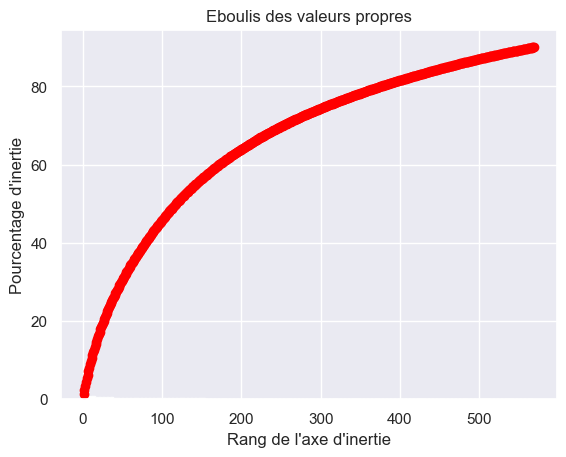

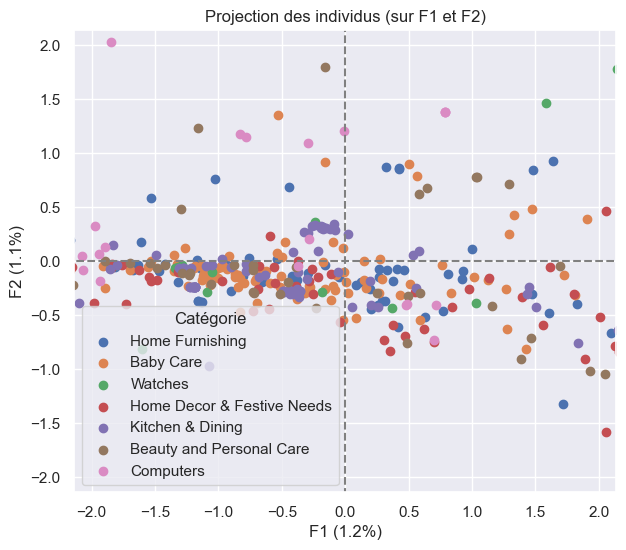

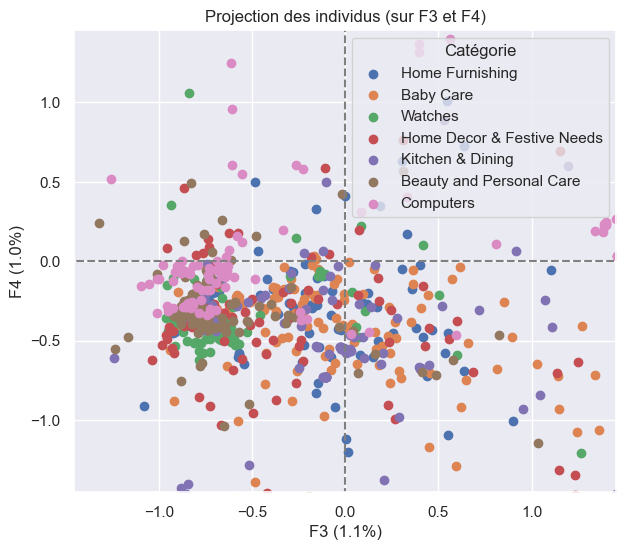

In [38]:
# Application de l'ACP.
df_ACP_count = ACP(df_count)

In [39]:
#pd.DataFrame(X_tsne_count)

ARI : 0.414096714227798


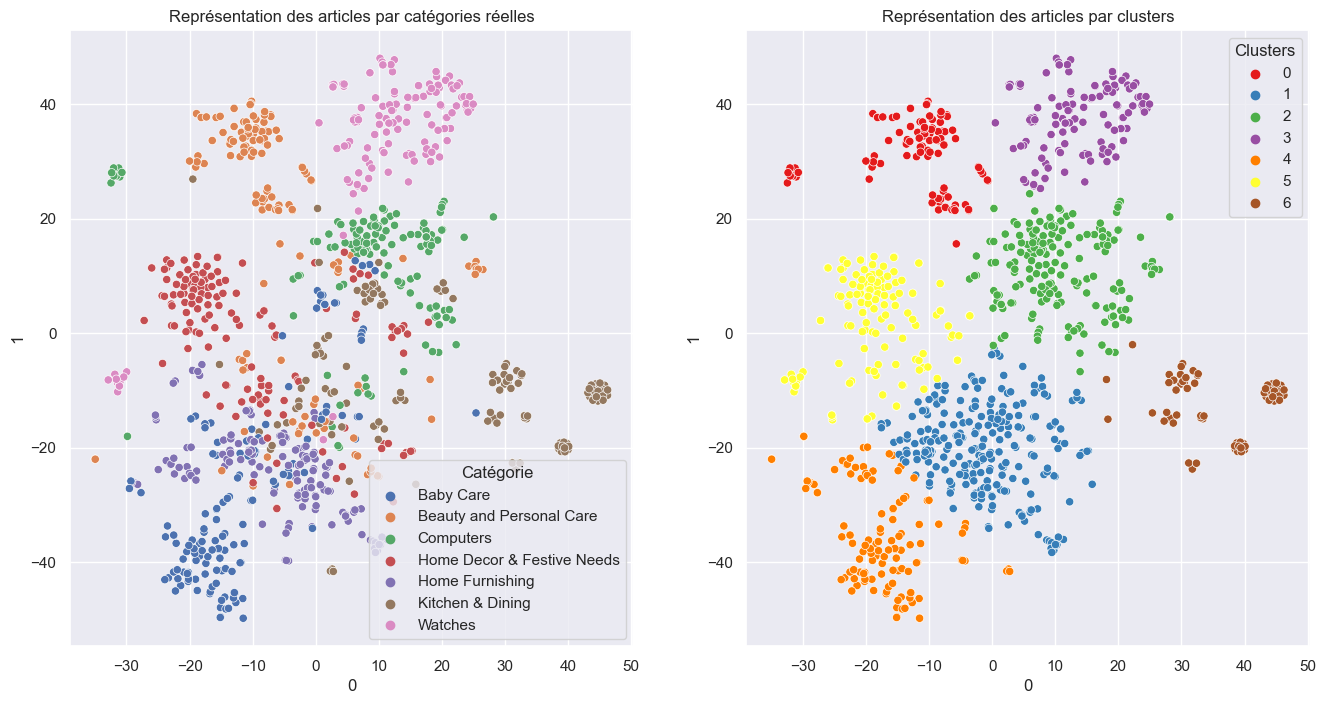

<Figure size 640x480 with 0 Axes>

In [40]:
# Application de t-sne
tsne = TSNE(n_components=2, init='pca', n_jobs=-1, random_state=6)
X_tsne_count = tsne.fit_transform(df_count.iloc[:, :-1])
ARI_count, labels_count = ARI(X_tsne_count, df_)
AfficheClusters(X_tsne_count, df_, labels_count)
plt.savefig(save_results_to + '8-CV_descript', dpi=300)

In [ ]:
labels_count

[Retour au sommaire - Approche Bag Of Words](#Partie1_4)

2. Avec la description et le nom de l'article <a class="anchor" id="PartieA_2"></a>

In [ ]:
df_['name + description'] = df_['product_name'] + ' ' + df_['description']
df_.head()

In [ ]:
count_vect2 = CountVectorizer(analyzer='word', ngram_range=(1, 1))
X_count2 = count_vect2.fit_transform(df_['name + description'])
df_count2 = pd.DataFrame(X_count2.toarray())
df_count2.columns = count_vect2.get_feature_names_out()
df_count2['Catégorie'] = df_['Catégorie']
print(df_count2.shape)
df_count2.head()

In [ ]:
# Application de l'ACP.
df_ACP_count2 = ACP(df_count2)

In [ ]:
# Application de t-sne
tsne = TSNE(n_components=2, init='pca', n_jobs=-1, random_state=6)
X_tsne_count2 = tsne.fit_transform(df_count2.iloc[:, :-1])
ARI_count2, labels_count2 = ARI(X_tsne_count2, df_)
AfficheClusters(X_tsne_count2, df_, labels_count2)
plt.savefig(save_results_to + '9-CV_descriprodname', dpi=300)

[Retour au sommaire - Approche Bag Of Words](#Partie1_4)

3. Seulement avec le nom du produit <a class="anchor" id="PartieA_3"></a>

In [ ]:
count_vect3 = CountVectorizer(analyzer='word', ngram_range=(1, 1))
X_count3 = count_vect3.fit_transform(df_['product_name'])
df_count3 = pd.DataFrame(X_count3.toarray())
df_count3.columns = count_vect3.get_feature_names_out()
df_count3['Catégorie'] = df_['Catégorie']
print(df_count3.shape)
df_count3.head()

In [ ]:
# Application de l'ACP
df_ACP_count3 = ACP(df_count3)

In [ ]:
# Application de t-sne.
tsne = TSNE(n_components=2, init='pca', n_jobs=-1, random_state=6)
X_tsne_count3 = tsne.fit_transform(df_count3.iloc[:, :-1])
ARI_count3, labels_count3 = ARI(X_tsne_count3, df_)
AfficheClusters(X_tsne_count3, df_, labels_count3)
plt.savefig(save_results_to + '10-CV_prodname', dpi=300)

[Retour au sommaire - Approche Bag Of Words](#Partie1_4)

#### Tf-Idf <a class="anchor" id="PartieB"></a>
1. Seulement avec la description <a class="anchor" id="PartieB_1"></a>

In [ ]:
vect = TfidfVectorizer(analyzer='word', ngram_range=(1, 1))
tfidf_mat = vect.fit_transform(df_['description'])
feature_names = vect.vocabulary_
dense = tfidf_mat.todense()
denselist = dense.tolist()
df_tfidf = pd.DataFrame(denselist, columns=feature_names)
df_tfidf['Catégorie'] = df_['Catégorie']
print(df_tfidf.shape)
df_tfidf.head()

In [ ]:
# Application de l'ACP.
df_ACP_tfidf = ACP(df_tfidf)

In [ ]:
# Application de t-sne.
tsne = TSNE(n_components=2, init='pca', n_jobs=-1, random_state=6)
X_tsne_tfidf = tsne.fit_transform(df_tfidf.iloc[:, :-1])
ARI_tfidf, labels_tfidf = ARI(X_tsne_tfidf, df_)
AfficheClusters(X_tsne_tfidf, df_, labels_tfidf)
plt.savefig(save_results_to + '11-TF_descript', dpi=300)

[Retour au sommaire - Approche Bag Of Words](#Partie1_4)

2. Avec la description et le nom de l'article <a class="anchor" id="PartieB_2"></a>

In [ ]:
vect2 = TfidfVectorizer(analyzer='word', ngram_range=(1, 1))
tfidf_mat2 = vect2.fit_transform(df_['name + description'])
feature_names2 = vect2.vocabulary_
dense2 = tfidf_mat2.todense()
denselist2 = dense2.tolist()
df_tfidf2 = pd.DataFrame(denselist2, columns=feature_names2)
df_tfidf2['Catégorie'] = df_['Catégorie']
print(df_tfidf2.shape)
df_tfidf2.head()

In [ ]:
# Application de l'ACP.
df_ACP_tfidf2 = ACP(df_tfidf2)

In [ ]:
# Application de t-sne.
tsne = TSNE(n_components=2, init='pca', n_jobs=-1, random_state=6)
X_tsne_tfidf2 = tsne.fit_transform(df_tfidf2.iloc[:, :-1])
ARI_tfidf2, labels_tfidf2 = ARI(X_tsne_tfidf2, df_)
AfficheClusters(X_tsne_tfidf2, df_, labels_tfidf2)
plt.savefig(save_results_to + '12-TF_descriprodname', dpi=300)

[Retour au sommaire - Approche Bag Of Words](#Partie1_4)

3. Seulement avec le nom du produit <a class="anchor" id="PartieB_3"></a>

In [ ]:
vect3 = TfidfVectorizer(analyzer='word', ngram_range=(1, 1))
tfidf_mat3 = vect3.fit_transform(df_['product_name'])
feature_names3 = vect3.vocabulary_
dense3 = tfidf_mat3.todense()
denselist3 = dense3.tolist()
df_tfidf3 = pd.DataFrame(denselist3, columns=feature_names3)
df_tfidf3['Catégorie'] = df_['Catégorie']
print(df_tfidf3.shape)
df_tfidf3.head()

In [ ]:
# Application de l'ACP.
df_ACP_tfidf3 = ACP(df_tfidf3)

In [ ]:
# Application de t-sne.
tsne = TSNE(n_components=2, init='pca', n_jobs=-1, random_state=6)
X_tsne_tfidf3 = tsne.fit_transform(df_tfidf3.iloc[:, :-1])
ARI_tfidf3, labels_tfidf3 = ARI(X_tsne_tfidf3, df_)
AfficheClusters(X_tsne_tfidf3, df_, labels_tfidf3)
plt.savefig(save_results_to + '13-TF_prodname', dpi=300)

[Retour au sommaire - Approche Bag Of Words](#Partie1_4)

#### Comparaison des performances <a class="anchor" id="PartieC"></a>

In [ ]:
listeARI = [ARI_count, ARI_count2, ARI_count3,
            ARI_tfidf, ARI_tfidf2, ARI_tfidf3]
listeDonnees = ['Description', 'Name + Description', 'Name',
                'Description', 'Name + Description', 'Name']
listeModeles = ['CountVectorizer', 'CountVectorizer', 'CountVectorizer',
                'Tfidf', 'Tfidf', 'Tfidf']
score = pd.DataFrame()
score['Modèle'] = listeModeles
score['ARI'] = listeARI
score['Données utilisées'] = listeDonnees

fig = plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Modèle', y='ARI', hue='Données utilisées', data=score)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Score ARI des différents modèles testés',
          fontsize=20)
plt.xlabel('Les différents modèles testés', fontsize=20)
plt.ylabel('ARI score', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
# plt.xticks(rotation=45)
plt.savefig(save_results_to + '14-CV_TF', dpi=300)
plt.show()

[Retour au sommaire - Approche Bag Of Words](#Partie1_4)

#### Count Vectorizer et Tf-Idf pour la phrase d'exemple <a class="anchor" id="PartieD"></a>

In [ ]:
lst = ['This is an example for preprocessing.',
       'Several sentences for preprocessing,',
       'And the third sentence !']
print(lst)
df_ex = pd.DataFrame(lst, columns=['text'])
df_ex['text'] = df_ex['text'].apply(lambda x: Nettoyage(x, False))

count_vect_ex = CountVectorizer(analyzer='word', ngram_range=(1, 1))
X_count_ex = count_vect_ex.fit_transform(df_ex['text'])
df_count_ex = pd.DataFrame(X_count_ex.toarray())
df_count_ex.columns = count_vect_ex.get_feature_names_out()
print(df_count_ex.shape)
df_count_ex.head()

In [ ]:
vect_ex = TfidfVectorizer(analyzer='word', ngram_range=(1, 1))
tfidf_mat_ex = vect_ex.fit_transform(df_ex['text'])
feature_names_ex = vect_ex.vocabulary_
dense_ex = tfidf_mat_ex.todense()
denselist_ex = dense_ex.tolist()
df_tfidf_ex = pd.DataFrame(denselist_ex, columns=feature_names_ex)
print(df_tfidf_ex.shape)
df_tfidf_ex.head()

[Retour au sommaire](#Sommaire)

### Sentence embedding <a class="anchor" id="Partie1_5"></a>

* [Word2vec](#PartieE)
    * [Seulement avec la description](#PartieE_1)
    * [Avec la description et le nom de l'article](#PartieE_2)
* [BERT](#PartieF)
    * [Seulement avec la description](#PartieF_1)
    * [Avec la description et le nom de l'article](#PartieF_2)
* [USE](#PartieG)
    * [Seulement avec la description](#PartieG_1)
    * [Avec la description et le nom de l'article](#PartieG_2)
* [Comparaison des performances](#PartieH)


#### Word2vec <a class="anchor" id="PartieE"></a>
1. Seulement avec la description <a class="anchor" id="PartieE_1"></a>

In [ ]:
w2v_size = 300
w2v_window = 5
w2v_min_count = 1
w2v_epochs = 100
sentences = df_['description'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]
maxlen = 24  # adapt to length of sentences

In [ ]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                   vector_size=w2v_size, seed=42, workers=1)
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count,
                epochs=w2v_epochs)

# Matrice des vecteurs de chacun des mots du dataset
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

In [ ]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(
    tokenizer.texts_to_sequences(sentences),
    # Crée un array de 1050 lignes : 1 ligne par article
    # Pour chaque article on remplace chaque mot de la description
    # par son index dans le vocabulaire
    maxlen=maxlen, padding='post')

num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

In [ ]:
# Création de la matrice d'embedding
# Matrice des vecteurs de chacun des mots du dictionnaire
# On supprime donc les mots qui apparaissent moins de 'w2v_min_count' fois

print("Create Embedding matrix ...")

# Dictionnaire des mots du dataset avec leurs index
word_index = tokenizer.word_index

vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i = 0
j = 0

for word, idx in word_index.items():
    i += 1
    if word in w2v_words:
        j += 1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]

word_rate = np.round(j/i, 4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

In [ ]:
# Création du modèle

input = Input(shape=(len(x_sentences), maxlen), dtype='float64')
word_input = Input(shape=(maxlen,), dtype='float64')
word_embedding = Embedding(input_dim=vocab_size, output_dim=w2v_size,
                           weights=[embedding_matrix],
                           input_length=maxlen)(word_input)
word_vec = GlobalAveragePooling1D()(word_embedding)
embed_model = Model([word_input], word_vec)

embed_model.summary()

In [ ]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

In [ ]:
pd.DataFrame(embeddings).head()

In [ ]:
# Application de t-sne.
tsne = TSNE(n_components=2, init='pca', n_jobs=-1, random_state=6)
X_tsne_w2v = tsne.fit_transform(embeddings)
ARI_w2v, labels_w2v = ARI(X_tsne_w2v, df_)
AfficheClusters(X_tsne_w2v, df_, labels_w2v)
plt.savefig(save_results_to + '15-W2V_descript', dpi=300)

[Retour au sommaire - Sentence embeddings](#Partie1_5)

2. Avec la description et le nom de l'article <a class="anchor" id="PartieE_2"></a>

In [ ]:
sentences2 = df_['name + description'].to_list()
sentences2 = [gensim.utils.simple_preprocess(text) for text in sentences2]

# Création et entraînement du modèle Word2Vec
print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                   vector_size=w2v_size, seed=42, workers=1)
w2v_model.build_vocab(sentences2)
w2v_model.train(sentences2, total_examples=w2v_model.corpus_count,
                epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")


print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences2)
x_sentences2 = pad_sequences(tokenizer.texts_to_sequences(sentences2),
                             maxlen=maxlen, padding='post')

num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

# Création de la matrice d'embedding
print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i = 0
j = 0

for word, idx in word_index.items():
    i += 1
    if word in w2v_words:
        j += 1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]

word_rate = np.round(j/i, 4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

# Création du modèle
input = Input(shape=(len(x_sentences2), maxlen), dtype='float64')
word_input = Input(shape=(maxlen,), dtype='float64')
word_embedding = Embedding(input_dim=vocab_size,
                           output_dim=w2v_size,
                           weights=[embedding_matrix],
                           input_length=maxlen)(word_input)
word_vec = GlobalAveragePooling1D()(word_embedding)
embed_model = Model([word_input], word_vec)

embed_model.summary()

embeddings2 = embed_model.predict(x_sentences2)
embeddings2.shape

In [ ]:
# Application de t-sne.
tsne = TSNE(n_components=2, init='pca', n_jobs=-1, random_state=6)
X_tsne_w2v2 = tsne.fit_transform(embeddings2)
ARI_w2v2, labels_w2v2 = ARI(X_tsne_w2v2, df_)
AfficheClusters(X_tsne_w2v2, df_, labels_w2v2)
plt.savefig(save_results_to + '16-W2V_descriprodname', dpi=300)

[Retour au sommaire - Sentence embeddings](#Partie1_5)

#### BERT <a class="anchor" id="PartieF"></a>
1. Seulement avec la description <a class="anchor" id="PartieF_1"></a>

In [ ]:
#import tensorflow as tf
# import tensorflow_hub as hub
#import tensorflow.keras
#from tensorflow.keras import backend as K

#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras import metrics as kmetrics
#from tensorflow.keras.layers import *
#from tensorflow.keras.models import Model

# Bert
#import os
#import transformers
#from transformers import *

#os.environ["TF_KERAS"]='1'

In [ ]:
#os.environ["TF_KERAS"] = '1'

print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ",
      len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

In [ ]:
#from transformers import BertTokenizer

In [ ]:
# Fonction de préparation des sentences. Replaces bert_tokenizer by BertTokenizerFast
def bert_inp_fct(sentences, bert_tokenizer, max_length):
    input_ids = []
    token_type_ids = []
    attention_mask = []
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens=True,
                                              #max_length=max_length,
                                              max_length=64,
                                              padding='max_length',
                                              return_attention_mask=True,
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")

        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0],
                             bert_inp['token_type_ids'][0],
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)

    return input_ids, token_type_ids, attention_mask, bert_inp_tot


# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF'):
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)

    for step in range(len(sentences)//batch_size):
        idx = step*batch_size
        list_ = bert_inp_fct(sentences[idx:idx+batch_size], bert_tokenizer, max_length)
        [input_ids, token_type_ids, attention_mask, bert_inp_tot] = list_

        if mode == 'HF':    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode == 'TFhub':  # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids": input_ids,
                                 "input_mask": attention_mask,
                                 "input_type_ids": token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']

        if step == 0:
            last_hidden_states_tot = last_hidden_states
        else:
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot, last_hidden_states))

    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    return features_bert, last_hidden_states_tot

In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df_['description'].to_list()

In [ ]:
# Création des features
features_bert, last_hidden_states_tot = feature_BERT_fct(
    model, model_type, sentences, max_length, batch_size, mode='HF')

In [ ]:
# Application de t-sne.
tsne = TSNE(n_components=2, init='pca', n_jobs=-1, random_state=6)
X_tsne_bert = tsne.fit_transform(features_bert)
ARI_bert, labels_bert = ARI(X_tsne_bert, df_)
AfficheClusters(X_tsne_bert, df_, labels_bert)
plt.savefig(save_results_to + '17-Bert_descript', dpi=300)

[Retour au sommaire - Sentence embeddings](#Partie1_5)

2. Avec la description et le nom de l'article <a class="anchor" id="PartieF_2"></a>

In [ ]:
sentences2 = df_['name + description'].to_list()

# Création des features
features_bert2, last_hidden_states_tot = feature_BERT_fct(
    model, model_type, sentences2, max_length, batch_size, mode='HF')

In [ ]:
# Application de t-sne.
tsne = TSNE(n_components=2, init='pca', n_jobs=-1, random_state=6)
X_tsne_bert2 = tsne.fit_transform(features_bert2)
ARI_bert2, labels_bert2 = ARI(X_tsne_bert2, df_)
AfficheClusters(X_tsne_bert2, df_, labels_bert2)
plt.savefig(save_results_to + '18-Bert_descriprodname', dpi=300)

[Retour au sommaire - Sentence embeddings](#Partie1_5)

#### USE <a class="anchor" id="PartieG"></a>

In [ ]:
#pip install --upgrade tensorflow-hub

In [ ]:
#embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")
embed = hub.load("C://Users//dieud//OneDrive//Documents//universal-sentence-encoder-large_5")
batch_size = 10
#b_size=10

In [ ]:
def feature_USE_fct(sentences, b_size):
    batch_size = b_size

    for step in range(len(sentences)//batch_size):
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])
        print(feat)
        if step == 0:
            features = feat
        else:
            features = np.concatenate((features, feat))
    return features

1. Seulement avec la description <a class="anchor" id="PartieG_1"></a>

In [ ]:
#sentences

In [ ]:
sentences = df_['description'].to_list()

features_USE = feature_USE_fct(sentences, batch_size)

#features_USE_tf = embed(sentences)

In [ ]:
#features_USE = features_USE_tf['outputs'].numpy()

In [ ]:
# Application de t-sne.
tsne = TSNE(n_components=2, init='pca', n_jobs=-1, random_state=6)
X_tsne_use = tsne.fit_transform(features_USE)
ARI_use, labels_use = ARI(X_tsne_use, df_)
AfficheClusters(X_tsne_use, df_, labels_use)
plt.savefig(save_results_to + '19-Use_descript', dpi=300)

[Retour au sommaire - Sentence embeddings](#Partie1_5)

2. Avec la description et le nom de l'article <a class="anchor" id="PartieG_2"></a>

In [ ]:
#sentences2 = df_['name + description'].to_list()
#features_USE_tf2 = embed(sentences2)

In [ ]:
#features_USE2 = features_USE_tf2['outputs'].numpy()

In [ ]:
sentences2 = df_['name + description'].to_list()
features_USE2 = feature_USE_fct(sentences2, batch_size)

In [ ]:
# Application de t-sne.
tsne = TSNE(n_components=2, init='pca', n_jobs=-1, random_state=6)
X_tsne_use2 = tsne.fit_transform(features_USE2)
ARI_use2, labels_use2 = ARI(X_tsne_use2, df_)
AfficheClusters(X_tsne_use2, df_, labels_use2)
plt.savefig(save_results_to + '20-Use_descriprodname', dpi=300)

[Retour au sommaire - Sentence embeddings](#Partie1_5)

#### Comparaison des performances <a class="anchor" id="PartieH"></a>

In [ ]:
listeARI = [ARI_w2v, ARI_w2v2,
            ARI_bert, ARI_bert2,
            ARI_use, ARI_use2]
listeDonnees = ['Description', 'Name + Description',
                'Description', 'Name + Description',
                'Description', 'Name + Description']
listeModeles = ['Word2vec', 'Word2vec',
                'BERT', 'BERT', 'USE', 'USE']
score = pd.DataFrame()
score['Modèle'] = listeModeles
score['ARI'] = listeARI
score['Données utilisées'] = listeDonnees

fig = plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Modèle', y='ARI', hue='Données utilisées', data=score)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Score ARI des différents modèles testés',
          fontsize=20)
plt.xlabel('Les différents modèles testés', fontsize=20)
plt.ylabel('ARI score', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
# plt.xticks(rotation=45)
plt.savefig(save_results_to + '21-W2V_Bert_Use', dpi=300)
plt.show()